In [8]:
%matplotlib inline
%precision 16
import numpy
from scipy.special import erf, fresnel
import matplotlib.pyplot as plt

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

# HW 4:  Numerical  Quadrature 

## Question 1 - Basic  Quadrature Rules

The Error Function $\mathrm{erf}(x)$ is defined by the definite integral

$$
    \mathrm{erf}(x) = \frac{2}{\pi}\int_0^x e^{-t^2}dt
$$ 

We will use this function to test and understand the different errors associated with a range of both single interval and extended quadrature rules.  

Use the function definitions below to write a set of functions for approximating 
$$
 I[f] =  \int_a^b f(x) dx
$$ 
which we will use for testing against $\mathrm{erf}(x)$

**(a)** [8] Single step quadrature rules

Write short python functions for calculating $I[f]$ for the following newton-Cotes  quadrature rules on a single interval

* Left-Rectangle rule (a 1-point quadrature rule like  Mid-point, but evaluated at $x=a$, not the mid-point)
* Mid-point rule
* Trapezoidal rule
* Simpson's Rule

In [33]:
def I_left(f, a, b):
    """ Left rectangle rule"""
    return f(a) * (b-a)
    
def I_midpoint(f, a, b):
    """ Newton-Cotes Midpoint rule"""
    return f((a+b)/2) * (b-a)
    
    
def I_trapezoid(f, a, b):
    """ Newton-Cotes Midpoint rule"""
    return (b-a) * (0.5 * (f(a) + f(b)))
   
    
def I_simpson(f, a, b):
    """ Newton-Cotes Simpsons rule"""
    return ((b-a)/6) * (f(a) + 4*f((a+b)/2) + f(b))
    
    

In [34]:
# test against erf(1.)

x = 1.0
I_true = erf(x)
print('x = {}, erf(x) = {}\n'.format(x,I_true))
f = lambda x : 2./numpy.sqrt(numpy.pi) * numpy.exp(-x*x)

I = numpy.zeros(4)
I[0] = I_left(f, 0., x)
I[1] = I_midpoint(f, 0., x)
I[2] = I_trapezoid(f, 0., x)
I[3] = I_simpson(f, 0., x)

err = numpy.abs( I - I_true)/numpy.abs(I_true)
answer = numpy.array([0.339003328982087,  0.0428168411464673,
          0.084202437312641, 0.0004770816600977])
numpy.testing.assert_allclose(err, answer)
print('success!')

x = 1.0, erf(x) = 0.8427007929497148

success!


**(b)** [8] Repeat the exercise for  3 point Gauss-Legendre Quadrature

* First:  calculate the weights $w_i$, using the method of undetermined coefficients such that the quadrature rule exactly integrates the monomials $1, x, x^2$ over the interval $x\in[-1,1]$.
(hint:  the 3 quadrature points $x_i$ are the roots of 

$$
    P_3(x) = (5x^3 - 3x)/2
$$
and this rule will exactly integrate polynomials up to order 5).

First, we must find the roots of our polynomial in order to find out quadrature points $x_i$:
$$
\begin{aligned}
    P_3(x) = \frac{5x^3 - 3x}{2} = 0\\
    5x^3 - 3x = 0\\
    5x^2 - 3 = 0 \\
    x = -\sqrt\frac{3}{5}, 0, \sqrt\frac{3}{5}\\
\end{aligned}
$$

For Gauss-Legendre, the approximate integral is:
$$
\int_{-1}^{1} f(x) \, dx \approx \sum_{i=1}^{3} w_i f(x_i)
$$

We next must find the weights, $w_i$. We do this by computing the integral of monomials, $1, x, x^2$ for the integral over $[-1,1]$.

Monomial $1$:
   $$
     \int_{-1}^{1} 1 \, dx = 2
     $$
     This gives the equation:
     $$
     w_1 + w_2 + w_3 = 2.
     $$

Monomial $x$:
     $$
     \int_{-1}^{1} x \, dx = 0
     $$
     Giving the equation:
     $$
     w_1 \cdot \left(-\sqrt{\frac{3}{5}}\right) + w_2 \cdot 0 + w_3 \cdot \sqrt{\frac{3}{5}} = 0,
     $$
     $$
     w_1 \cdot \left(-\sqrt{\frac{3}{5}}\right) + w_3 \cdot \sqrt{\frac{3}{5}} = 0
     $$

Monomial $x^2$:
     $$
     \int_{-1}^{1} x^2 \, dx = \frac{2}{3}
     $$
     Giving the equation:
     $$
     w_1 \cdot x_1^2 + w_2 \cdot x_2^2 + w_3 \cdot x_3^2 = w_1 \cdot \frac{3}{5} + w_2 \cdot 0 + w_3 \cdot \frac{3}{5} = \frac{2}{3},
     $$
     $$
     \frac{3}{5}(w_1 + w_3) = \frac{2}{3}
     $$
We now have to solve the system of equations that these three monomials give. From equation 2, we can see that, by symmetry:
$$
w_1=w_3
$$

Subsituting this into the third equation:

$$
\frac{6}{5}w_1 = \frac{2}{3}
$$
$$
w_1=w_3= \frac{5}{9}
$$

And finally, substituting this into the first equation, we get:
$$
w_2 = 2 - \frac{5}{9} - \frac{5}{9}
$$
$$
w_2 = \frac{8}{9}
$$

Thus, we have found the weights for this Gauss-Legendre Quadrature, where:
$$
w_1=w_3=\frac{5}{6}, w_2=\frac{8}{9}
$$


   




Next, implement your 3-point GL quadrature scheme to approximate 

$$
    \int_a^b f(x) dx
$$
for an arbitrary interval $x\in [a,b]$ (remember the affine mapping). 

In [35]:
def I_GL3(f, a, b):
#establish our xi and wi values, as well as what the midpoint and half pointds are
    x_i = numpy.array([-numpy.sqrt(3/5), 0, numpy.sqrt(3/5)])
    w_i = numpy.array([5/9, 8/9, 5/9])

    midpoint = (a+b)/2
    half = (b-a)/2
    
#initialise integral approximation
    
    integral = 0

#compute sum of all values found at different quadrature points
    for i in range(len(x_i)):
        x_new = (half * x_i[i]) + midpoint
        integral += w_i[i] * f(x_new)

    integral =  integral * half

    return integral

    

In [36]:
x = 1.0
I_true = erf(x)
f = lambda x : 2./numpy.sqrt(numpy.pi) * numpy.exp(-x*x)

I = I_GL3(f, 0., x)
err = numpy.abs( I - I_true)/numpy.abs(I_true)
print('x = {}, erf(x) = {}'.format(x,I_true))
print('       I_GL3(x) = {}, err={}\n'.format(I,err))

answer = 1.2785635535382798e-05
numpy.testing.assert_allclose(err, answer)
print('success!')

x = 1.0, erf(x) = 0.8427007929497148
       I_GL3(x) = 0.8426900184845107, err=1.2785635535382798e-05

success!


**(c)** [8] Extended Quadrature rules. 

All of the above rules approximate the integral for a single "panel" over the interval $[a,b]$, but can be extended to calculate the quadrature of $N$ panels that subdivide the interval.  

Write a function that computes

$$
    I_N[f] = \int_a^b f(x) dx = \sum_{n=1}^N I_{method}[f]_n
$$


where $I_{method}[f]_n$ is one of the quadrature methods used above. 

Note, this won't be the most efficient way to implement many of these methods,  but that's not really the issue here.

In [37]:
def quadN(f, a, b, N, method=I_midpoint):
    """ 
    integrate a function f over the interval x in [a,b] using 
    an extended quadrature rule that implements a single interval
    quadrature rule over N panels of width (a - b)/N 
        
    Parameters:
    -----------
        
    f:  function f(x) (type float)
    a: float
        left boundary of interval
    b: float
        right boundary of interval
    N: integer
        number of panels to subdivide [a,b]
    method:  quadrature function with interface I(f, x0, x1) (real)
        returns quadrature approximation for subinterval [x0, x1]
        defaults to a midpoint rule
            
    Returns:
    --------
    I_N:  extended quadrature approximation of \int_a^b f(x) dx
        
    """
    #definee the width and initialise the value of the total integral at 0
    delta_x =  (b-a)/N
    integral = 0

    for n in range(N):
        a_left = a + n * delta_x
        a_right = a_left + delta_x
        integral += method(f, a_left, a_right)

    return integral
        
    
    

<>:2: SyntaxWarning: invalid escape sequence '\i'
<>:2: SyntaxWarning: invalid escape sequence '\i'
/var/folders/j2/rkbxss0d4b10t_2h10nmd78w0000gn/T/ipykernel_9697/3322695183.py:2: SyntaxWarning: invalid escape sequence '\i'
  """


In [38]:
# Let's test against erf(1)

x = 1.
I_true = erf(x)
f = lambda x : 2./numpy.sqrt(numpy.pi) * numpy.exp(-x*x)

# set the number of panels in a list
N = [ 2**n for n in range (5)]

# integrate using the extended mid-point scheme and calculate relative errors for each N
err = numpy.zeros(len(N))
for i,n in enumerate(N):
    I = quadN(f, 0., x, n, method=I_midpoint)
    err[i] = numpy.abs(I - I_true)/numpy.abs(I_true)
    print('N = {}, I = {}, err = {}'.format(n, I, err[i]) )
    
answer = numpy.array([0.0428168411464673, 0.0104091587540129,
                      0.0025749021678512, 0.0006419796806984,
                      0.0001603854223201])
numpy.testing.assert_allclose(answer,err)
print('success!')
                    

N = 1, I = 0.8787825789354448, err = 0.042816841146467305
N = 2, I = 0.8514725992856609, err = 0.010409158754012854
N = 4, I = 0.844870665048331, err = 0.00257490216785125
N = 8, I = 0.843241789735697, err = 0.0006419796806984446
N = 16, I = 0.8428359498722815, err = 0.00016038542232009014
success!


**(d)** [10] Now *write a function* to make a plot that  compares the convergence behavior of all of the above methods (if you make it a function, you will be able to reuse it in the next  problem).


This function should  make a single, beautiful log-log plot with the following information

* plot the *relative error* for each quadrature rule with respect to 
$$
    I_{true} = \mathrm{erf}(1) = 0.8427007929497148
$$
for 
$$
    N = 2^n \quad \text{panels}\quad \text{for}\, n=0,1,\ldots,10
$$

* a legend that labels each curve with the name of the method

Hint 1: there are some nice python tricks for doing this relatively efficiently, e.g. you can loop over a list of methods and extract the name with 

`name = method.__name__`


* the calculated rate of convergence of each  scheme. 

Note, if we define the convergence behavior of the error as
$$
    |e| = C\Delta x^p
$$

calculate $C$ and $p$ for each method and plot the best fit straight-line in $\log(\Delta x)-\log(e)$ space (hint: `numpy.polyfit` is your friend).  Add the best fit value of $p$ to the legend.  Hint 2: be careful not to include floating point issues in your fit. 

In [39]:
def plot_quad_convergence(f, a, b, N, I_true, title=None):
    """ create a convergence log-log plot that plots relative error of 
    various extended quadrature schemes vs panel spacing dx
    
    If really fancy, also calculates the best fit straight line in log-log space to estimate convergence
    parameters
    
    Parameters:
    -----------
        
    f:  function f(x) (type real)
    a: real
        left boundary of interval
    b: real
        right boundary of interval
    N: List of integers 
        number of panels to subdivide [a,b]
    I_true:  real
        True solution to compute errors
    title:  string
        title of plot (if not None)
            
    Returns:
    --------
    Nothing but generates a pretty log-log plot all properly labeled
    
    """    
    #initialise array with names of all the methods
    methods = [I_left, I_midpoint, I_trapezoid, I_simpson, I_GL3]

    plt.figure(figsize=(10, 6))

    #iterating through each method to intiialise arrays for erros and dx (panel width)
    for method in methods:
        error = []
        dx_val = []

        #iterating through each panel
        for n in N:
            dx = (b - a) / n 
            approx_integral = quadN(f, a, b, n, method)  
            rel_error = numpy.abs((approx_integral - I_true) / I_true)  #relative error calculatio
            error.append(rel_error) 
            dx_val.append(dx)  

        #log-log fit
        log_dx = numpy.log(dx_val)
        log_err = numpy.log(error)
        p, log_C = numpy.polyfit(log_dx, log_err, 1)
        C = numpy.exp(log_C)

        #plot original data points for each method
        method_name = method.__name__
        plt.plot(dx_val, error, label=f"{method_name}, p={p:.2f}", marker='o')

        #least square line for each method
        fit_line = C * numpy.array(dx_val)**p
        plt.plot(dx_val, fit_line, linestyle='--')
        
    #plot
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel(r'$\Delta x$ (Panel Width)')
    plt.ylabel('Relative Error')
    plt.title(title if title else 'Convergence Behavior of Quadrature Methods')
    plt.legend()
    plt.grid(True, which="both", ls="--")
    plt.show()
    
    


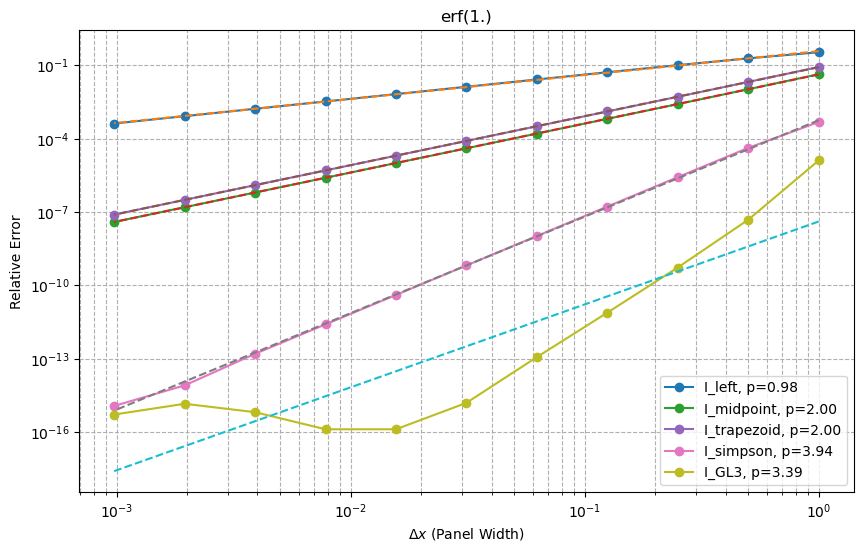

In [40]:
#Let's test with erf(1) and a lot of points

x = 1.
I_true = erf(x)
f = lambda x : 2./numpy.sqrt(numpy.pi) * numpy.exp(-x*x)    

N = [ 2**n for n in range (11)]

plot_quad_convergence(f, 0., 1., N, I_true, 'erf(1.)')

**(e)** [3] Estimate the number of *function evaluations* required to get a relative error $e \approx 10^{-7}$ i.e. about 7 digits of precision for the schemes

* Mid-point
* Simpson's
* 3-Pt GL quadrature


We know that the convergence behaviour of error is, $|e| = C\Delta x^p$. We want thus such that $|e| \approx 10^{-7}$, and we want to find the approximate number of $N$ divisions for this. We know that $\Delta x \approx\frac{b-a}{N} $, so let us substitute this into our equation for the convergence behaviour, and rearrange for $N$.
$$
|e| \approx \frac{C}{\left( \frac{b - a}{N} \right)^p}
$$
$$
N \approx \left( \frac{C \cdot (b - a)^p}{|e|} \right)^{\frac{1}{p}}
$$

We now define the values of the different variables, where $a=0$, $b=1$ and $|e|=10^{-7}$. Then:

For Mid-Point, $p=2$, $C=0.1$

Simpson's, $p=4$, $C=0.01$

GL Quadrature, $p=6$, $C=0.001$

Plugging these values into our equation for N, we get:

For midpoint, $N=1000$

Simpson's, $N=18$

GL Quadrature, $N\approx5$

But these are not strictly function evaluations, For midpoint there is one evaluation for every $N$, Simpson's there are $2N+1$, and for GL Quadrature there are $3N$ function evaluations.

Therefore, the approximate function evaluations for each method to achieve a relative error of $\approx e^{-7}$ is:

Midpoint: $\approx 1000$

Simpson's: $\approx 37$

GL Quadrature:$\approx 15$

## Question 2

Let's repeat the problem with a harder integral.

Consider the scaled Fresnel integrals

$$I_c = \int^1_0 \frac{\cos x}{\sqrt{x}} dx~~~~\text{and}~~~~I_s = \int^1_0 \frac{\sin x}{\sqrt{x}} dx$$

which have values

$$I_c = \sqrt{2 \pi} \cdot C\left(\sqrt{\frac{2}{\pi}}\right) \approx 1.8090484758005438$$

$$I_s = \sqrt{2 \pi} \cdot S\left(\sqrt{\frac{2}{\pi}}\right) \approx 0.62053660344676231$$

where the functions $C(x)$ and $S(x)$ can be evaluated by `scipy.special.fresnel`.


**(a)** [2] Where do you imagine the problematic points of the integrals will be?

Where $x \leq 0$

**(b)** [4] Use your convergence plotting routine to make  2 plots showing convergence behavior for all the extended quadrature rules for $I_c$ and $I_s$ 

In [41]:
# Set the True solutions for reference
Is_true, Ic_true = fresnel(numpy.sqrt(2.0 / numpy.pi))
Is_true *= numpy.sqrt(2.0 * numpy.pi)
Ic_true *= numpy.sqrt(2.0 * numpy.pi)

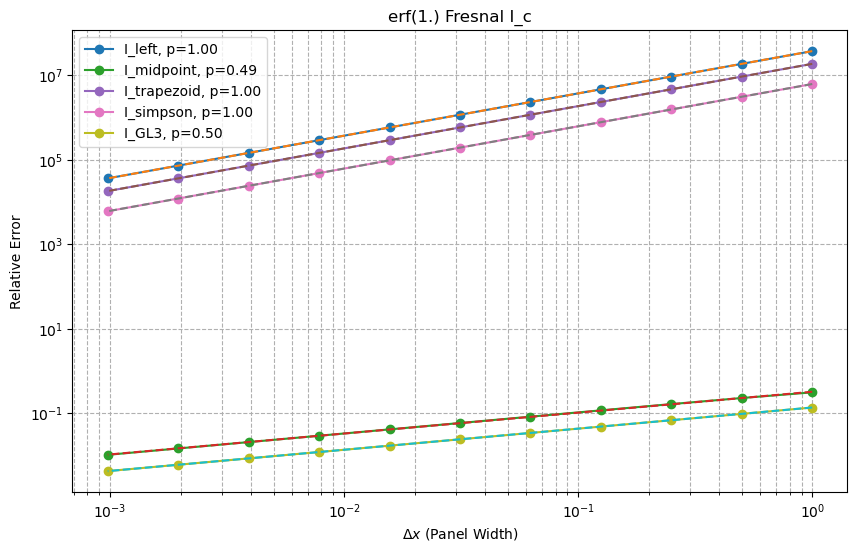

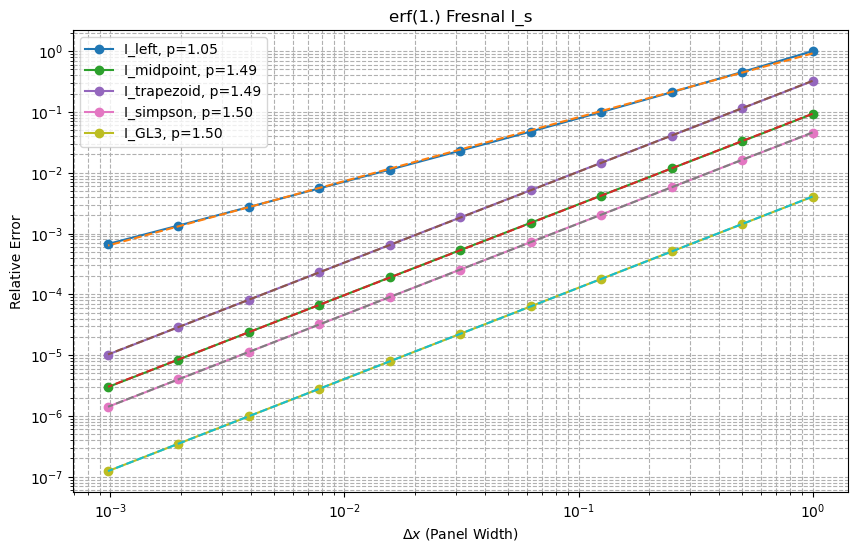

In [42]:

x = 1.
I_true = erf(x)
f_c = lambda x : (numpy.cos(x)) / (numpy.sqrt(x))
f_s = lambda x : (numpy.sin(x)) / (numpy.sqrt(x)) 
                  
N = [2**n for n in range (11)]

#preventing divergence for very small values of x where it is close to 0
min_x = numpy.finfo(float).eps 

plot_quad_convergence(f_c, min_x, 1., N, Ic_true, 'erf(1.) Fresnal I_c')
plot_quad_convergence(f_s, min_x, 1., N, Is_true, 'erf(1.) Fresnal I_s')


**(c)**  [4] Explain the results of your plots

The releative error for for $I_c$ it was particualrly poor. As values neared zero the relative error values blew up towards infinity. Methods with emphasis o the left side, (left triagle, trapezoid etc) showed larger errors due to the extreme values at 0. 
The largest relative accuracy was at $10^{7}$, and the midpoint meethod was comparatively moree accurate.
By contrast, it is clear that $I_s$ plot was far more accurate with smaller errors that peaked at $10^{-1}$, however they also increased greatly as values neared 0.

**(d)** [4] show that the convergence and the quadrature schemes can be dramatically improved simply by tranforming the variable $x$ with $x=t^2$

1. Show analytically what the transformed integral should be
2. produce two more plots demonstrating convergence behaviour
3. comment on the results

For Fresnel integrals:

$$
I_c = \int_0^1 \frac{\cos x}{\sqrt{x}} \, dx \quad \text{and} \quad I_s = \int_0^1 \frac{\sin x}{\sqrt{x}} \, dx
$$

Now, let us sub in $x = t^2$. We keep thee same bounds as $( x = 1 \rightarrow t = 1 )$ and $x = 0\rightarrow t = 0 $. Sub $x = t^2 $ into the integrals and use the differential substitution $dx = 2t \, dt $.

$$
I_c = \int_0^1 2t \frac{\cos t^2}{\sqrt{t^2}} \, dt \quad \text{and} \quad I_s = \int_0^1 2t \frac{\sin t^2}{\sqrt{t^2}} \, dt
$$

Simplifying, we get:

$$
I_c = \int_0^1 2 \cos t^2 \, dt \quad \text{and} \quad I_s = \int_0^1 2 \sin t^2 \, dt
$$


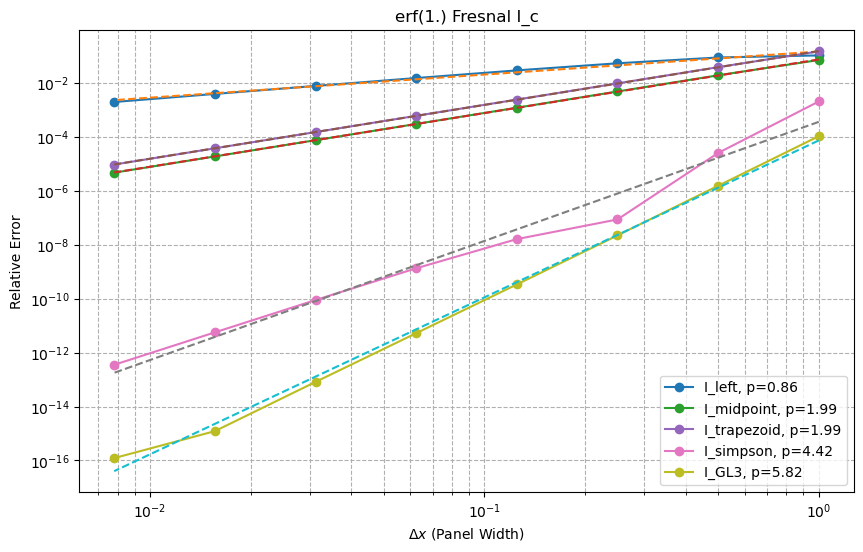

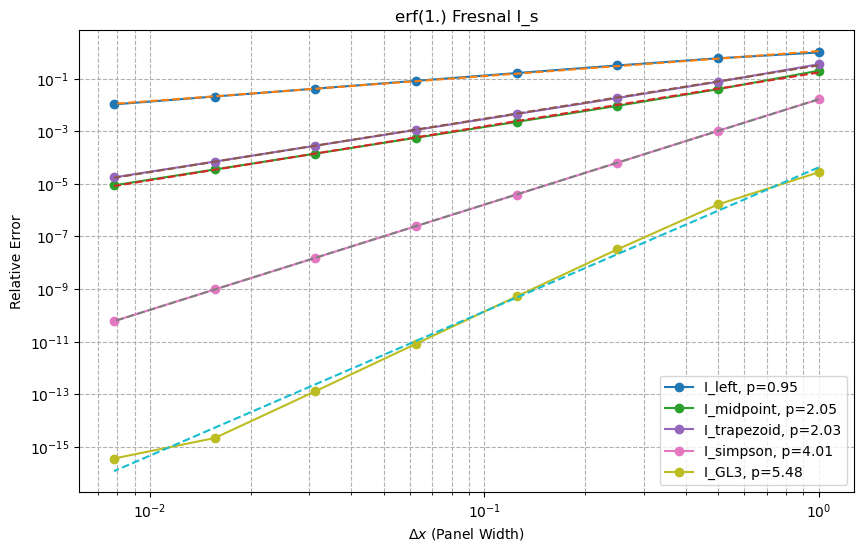

In [44]:
x = 1.
I_true = erf(x)
f_c = lambda t : 2* (numpy.cos(t**2)) 
f_s = lambda t : 2* (numpy.sin(t**2))
                  
N = [2**n for n in range (8)]

min_x = numpy.finfo(float).eps 

plot_quad_convergence(f_c, min_x, 1., N, Ic_true, 'erf(1.) Fresnal I_c')
plot_quad_convergence(f_s, min_x, 1., N, Is_true, 'erf(1.) Fresnal I_s')

This approximatiuon yields far smaller errors than approaches we used before, in particular for $I_c$, which saw larger errors with the standard fresnel intergral. The main issue we saw was integrating $I_c$ near zero led to extreme values and as a result large reelative errors, using the approximation $x=t^2$ allowed to integrate near there with a more stable model.